In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import env
import wrangle
import split_scale

In [2]:
df = sns.load_dataset('tips')

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:

y = df.total_bill
x = df.tip


In [22]:
regr = ols('y ~ x', data=df).fit()

In [30]:
df["yhat"] = regr.predict(pd.DataFrame(x))

In [34]:
df['residual'] = df['yhat'] - df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,residual
0,16.99,1.01,Female,No,Sun,Dinner,2,11.141475,-5.848525
1,10.34,1.66,Male,No,Sun,Dinner,3,13.967489,3.627489
2,21.01,3.50,Male,No,Sun,Dinner,3,21.967283,0.957283
3,23.68,3.31,Male,No,Sun,Dinner,2,21.141218,-2.538782
4,24.59,3.61,Female,No,Sun,Dinner,4,22.445532,-2.144468


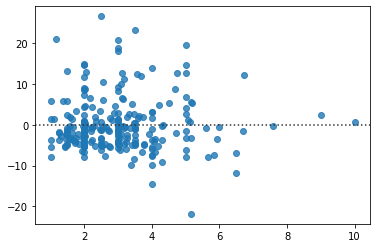

In [36]:
sns.residplot(x=x, y=y, data=df)

In [42]:
df['residual^2'] = df.residual ** 2
type(df['residual^2'])

pandas.core.series.Series

In [44]:

SSE = sum(df['residual^2'])

In [48]:
MSE = SSE/len(df)

In [49]:
MSE

42.88823752111092

In [75]:
MSE_function = mean_squared_error(df.total_bill, df.yhat)

In [76]:
MSE_function

42.88823752111093

In [50]:
RMSE = sqrt(MSE)

In [51]:
RMSE

6.548911170653556

In [54]:
ESS = sum((df.yhat - df.tip.mean())**2)


In [55]:
ESS

77559.19525960315

(244, 10)

In [57]:
TSS = ESS + SSE

In [58]:
TSS

88023.92521475421

In [64]:
yhat = df.total_bill.mean()

In [62]:
yhat.mean()

19.785942622950824

In [67]:
df['residual'] = yhat - df['total_bill']

In [73]:
def baseline_mean_errors(y):
    yhat = y.mean() 
    df['residual'] = yhat - y
    df['residual^2'] = df.residual ** 2
    SSE = sum(df['residual^2'])
    MSE = SSE/len(df)
    RMSE = sqrt(MSE)
    ESS = sum((df.yhat - df.tip.mean())**2)
    TSS = ESS + SSE
    return SSE, ESS, TSS, MSE, RMSE

In [74]:
baseline_mean_errors(x)

(19258.464083196715,
 77559.19525960315,
 96817.65934279986,
 78.92813148851113,
 8.88415057777113)